In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import imdb
from keras import (
    models, layers, optimizers
)
from tensorflow.keras.utils import to_categorical

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
word_index = imdb.get_word_index()
word_index = {value: key for key, value in word_index.items()}

In [5]:
for _ in train_data[0]:
    print(word_index.get(_ - 3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

In [6]:
# dim = np.max(np.apply_along_axis(np.max,0,train_data))
def vectorizar(sequences, dim=10000):
    results = np.zeros((len(sequences), dim), dtype=np.int8)
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

In [7]:
np.array([0,1,2,3,4,4], dtype=np.int8)

array([0, 1, 2, 3, 4, 4], dtype=int8)

In [8]:
X_train = vectorizar(train_data)
X_test = vectorizar(test_data)
X_train, X_test

(array([[0, 1, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 1, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0]], dtype=int8),
 array([[0, 1, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 1, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0]], dtype=int8))

In [9]:
y_train = train_labels.astype(np.int8)
y_test = test_labels.astype(np.int8)

In [10]:
from tensorflow.keras import (
    activations, optimizers, losses, metrics
)

In [11]:
new_dir = lambda func: list(filter(lambda x: False if x.startswith('_') else True,func.__dir__()))
new_dir(metrics)

['binary_crossentropy',
 'categorical_crossentropy',
 'hinge',
 'kl_divergence',
 'KLD',
 'kld',
 'kullback_leibler_divergence',
 'log_cosh',
 'logcosh',
 'mean_absolute_error',
 'MAE',
 'mae',
 'mean_absolute_percentage_error',
 'MAPE',
 'mape',
 'mean_squared_error',
 'MSE',
 'mse',
 'mean_squared_logarithmic_error',
 'MSLE',
 'msle',
 'poisson',
 'sparse_categorical_crossentropy',
 'squared_hinge',
 'AUC',
 'Accuracy',
 'BinaryAccuracy',
 'BinaryCrossentropy',
 'CategoricalAccuracy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'FalseNegatives',
 'FalsePositives',
 'Hinge',
 'KLDivergence',
 'LogCoshError',
 'Mean',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanIoU',
 'MeanMetricWrapper',
 'MeanRelativeError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'MeanTensor',
 'Metric',
 'Poisson',
 'Precision',
 'PrecisionAtRecall',
 'Recall',
 'RecallAtPrecision',
 'RootMeanSquaredError',
 'SensitivityAtSpecificity',
 'SparseCategoricalAccu

In [12]:
print(metrics.binary_accuracy.__doc__)

Calculates how often predictions match binary labels.

  Standalone usage:
  >>> y_true = [[1], [1], [0], [0]]
  >>> y_pred = [[1], [1], [0], [0]]
  >>> m = tf.keras.metrics.binary_accuracy(y_true, y_pred)
  >>> assert m.shape == (4,)
  >>> m.numpy()
  array([1., 1., 1., 1.], dtype=float32)

  Args:
    y_true: Ground truth values. shape = `[batch_size, d0, .. dN]`.
    y_pred: The predicted values. shape = `[batch_size, d0, .. dN]`.
    threshold: (Optional) Float representing the threshold for deciding whether
      prediction values are 1 or 0.

  Returns:
    Binary accuracy values. shape = `[batch_size, d0, .. dN-1]`
  


In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape= (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics='accuracy')

## Detectar overfitting

In [14]:
X_val = X_train[:10000]
partial_X_val = X_train[10000:]

y_val = y_train[:10000]
partial_y_val = y_train[10000:]

In [15]:
X_val.shape

(10000, 10000)

In [16]:
partial_X_val.shape

(15000, 10000)

In [17]:
history = model.fit(partial_X_val, partial_y_val,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5219 - accuracy: 0.7859 - val_loss: 0.3894 - val_accuracy: 0.8659
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3033 - accuracy: 0.9053 - val_loss: 0.3031 - val_accuracy: 0.8881
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2227 - accuracy: 0.9268 - val_loss: 0.3010 - val_accuracy: 0.8763
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1764 - accuracy: 0.9426 - val_loss: 0.2876 - val_accuracy: 0.8840
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1439 - accuracy: 0.9541 - val_loss: 0.2850 - val_accuracy: 0.8839
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1190 - accuracy: 0.9638 - val_loss: 0.2976 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0998 - accuracy: 0.9711 - val_loss: 0.3168 - val_accuracy: 0.8807
Epoch 8/20
30

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history

In [19]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

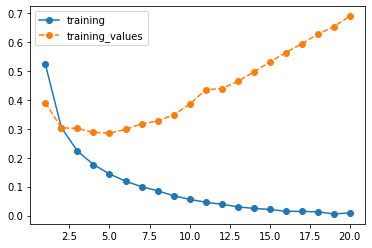

In [20]:
epoch = range(1,len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o-', label='training')
plt.plot(epoch, val_loss_values, 'o--', label='training_values')
plt.legend()
plt.show()

## Regularizaciones

1. _L1 Regularization_

$$\text{cost} = \sum_{i=0}^{N} \left(y_i - \sum_{j=0}^{M} x_{ij} W_j \right)^2 + \lambda \sum_{j=0}^{M} |W_j|$$

2. _L2 Regularization_

$$\text{cost} = \sum_{i=0}^{N} \left(y_i - \sum_{j=0}^{M} x_{ij} W_j \right)^2 + \lambda \sum_{j=0}^{M} {W_j}^2$$

3. _Drop-out_

    Apagar aleatoriamente ciertas neuronas.

In [21]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape= (10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics='accuracy')

history2 = model2.fit(partial_X_val, partial_y_val,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 29ms/step - loss: 0.5444 - accuracy: 0.7773 - val_loss: 0.4448 - val_accuracy: 0.8569
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3673 - accuracy: 0.8948 - val_loss: 0.3535 - val_accuracy: 0.8816
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2836 - accuracy: 0.9169 - val_loss: 0.3103 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2306 - accuracy: 0.9316 - val_loss: 0.3042 - val_accuracy: 0.8780
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1947 - accuracy: 0.9415 - val_loss: 0.2775 - val_accuracy: 0.8925
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1669 - accuracy: 0.9505 - val_loss: 0.2879 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1466 - accuracy: 0.9565 - val_loss: 0.2773 - val_accuracy: 0.8882
Epoch 8/20
30

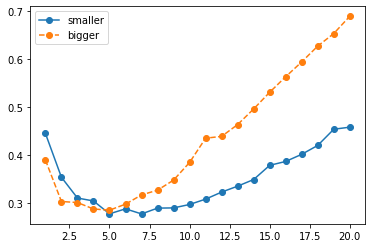

In [22]:
history_dict2 = history2.history
loss_values2 = history_dict2['loss']
val_loss_values_2 = history_dict2['val_loss']
epoch = range(1,len(loss_values) + 1)
plt.plot(epoch, val_loss_values_2, 'o-', label='smaller')
plt.plot(epoch, val_loss_values, 'o--', label='bigger')
plt.legend()
plt.show()

In [23]:
from keras import regularizers

In [24]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape= (10000,),
                       kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu',
                       kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))
model3.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics='accuracy')

history3 = model3.fit(partial_X_val, partial_y_val,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5813 - accuracy: 0.7739 - val_loss: 0.4499 - val_accuracy: 0.8620
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3694 - accuracy: 0.8991 - val_loss: 0.3654 - val_accuracy: 0.8824
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2938 - accuracy: 0.9199 - val_loss: 0.3422 - val_accuracy: 0.8846
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2498 - accuracy: 0.9373 - val_loss: 0.3462 - val_accuracy: 0.8784
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2262 - accuracy: 0.9431 - val_loss: 0.3363 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2117 - accuracy: 0.9485 - val_loss: 0.3537 - val_accuracy: 0.8831
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1937 - accuracy: 0.9558 - val_loss: 0.3466 - val_accuracy: 0.8834
Epoch 8/20
30

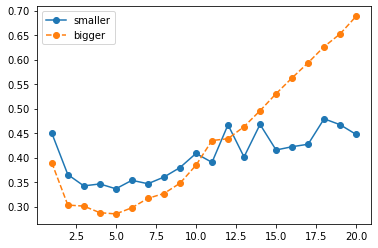

In [25]:
history_dict3 = history3.history
loss_values_3 = history_dict3['loss']
val_loss_values_3 = history_dict3['val_loss']
epoch = range(1,len(loss_values) + 1)
plt.plot(epoch, val_loss_values_3, 'o-', label='smaller')
plt.plot(epoch, val_loss_values, 'o--', label='bigger')
plt.legend()
plt.show()